> # 1) **Create a new data folder with augmented & original images/labels**  

In [2]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
import uuid

### 1.1) Exploring the dataset

In [5]:
def load_img(img_path: str) -> np.ndarray:
    """
        Load image from path
    """
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [6]:
def load_mask(mask_path: str) -> np.ndarray:
    """
        Load mask from path
    """
    
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return mask

In [7]:
def visualise(img_path: str, mask_path: str) -> None:
    """
        Visualise image and corresponding mask
    """

    img = load_img(img_path)
    mask = load_mask(mask_path)
    
    _, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[1].imshow(mask, cmap='gray')
    plt.show()

In [73]:
def show_samples(path: str, n_samples: int = 5) -> None:
    """
        Show random samples from the dataset
    """

    imgs_dir_path = os.path.join(path, 'images')
    masks_dir_path = os.path.join(path, 'labels')

    for _ in range(n_samples):
        # Get random image and mask
        name = np.random.choice(os.listdir(imgs_dir_path))

        img_path = os.path.join(imgs_dir_path, name)
        mask_path = os.path.join(masks_dir_path, name)

        # Visualise image and mask
        visualise(img_path, mask_path)

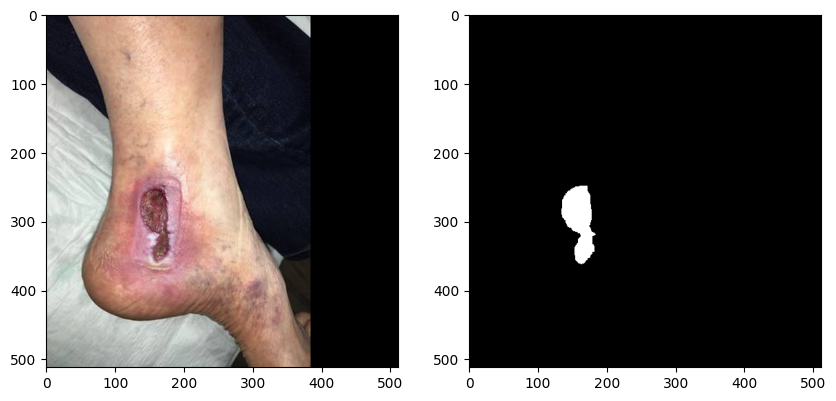

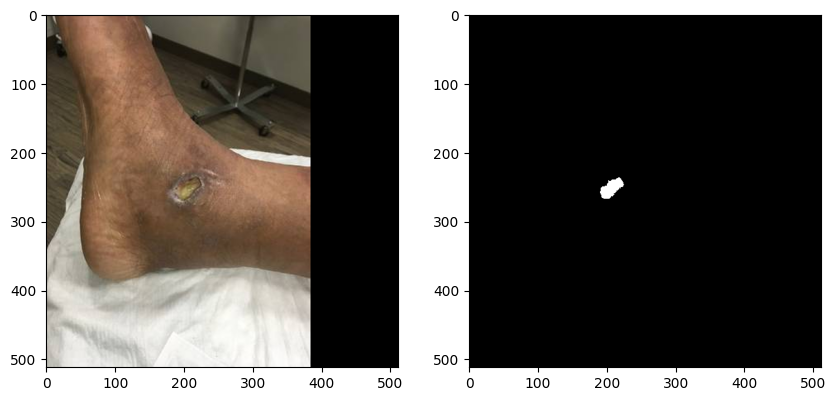

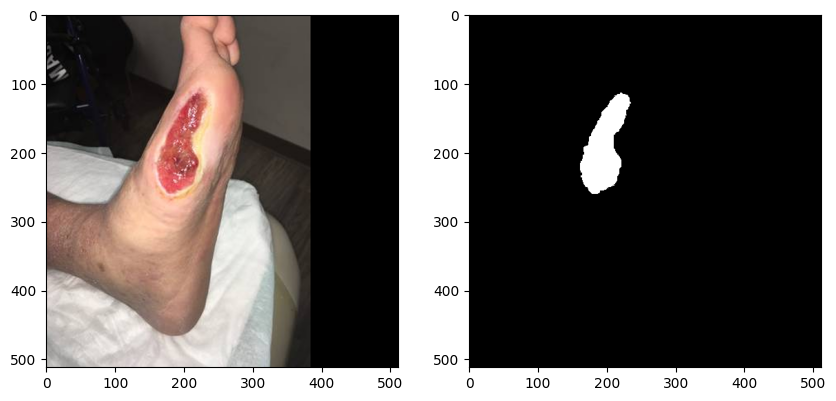

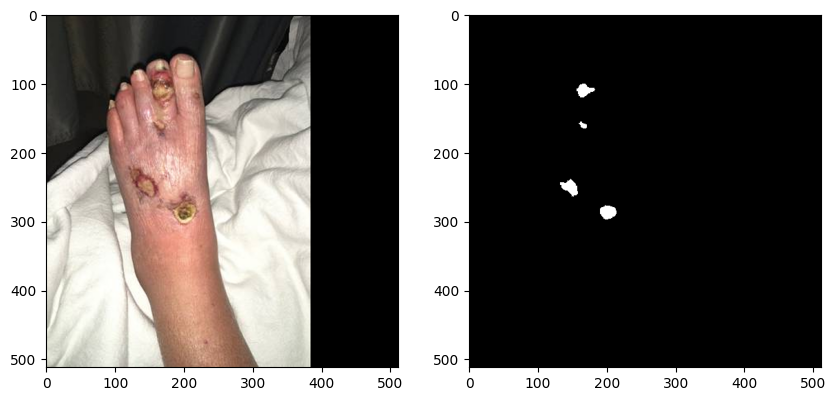

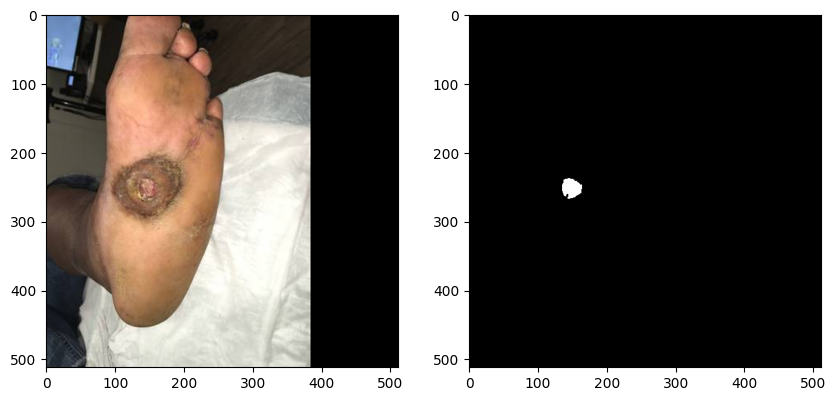

In [75]:
show_samples('data/train')

### 1.2) Create the Augmented data folders

In [7]:
# define augmentations for training

augmentations = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(p=0.2)
    ]
)

In [8]:
def apply_augmentations(img: np.ndarray, mask: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
        Apply augmentations to image and mask
    """
    
    augmented = augmentations(image=img, mask=mask)
    img = augmented['image']
    mask = augmented['mask']
    return img, mask

In [ ]:
# perform augmentations on all training images, masks and save them using uuid names
# ! use same name for image and mask

def augement_save_images_masks(train_data_dir: str, n_augments=5) -> None:
    """
        Augment images and masks and save them to a new directory
    """

    # get image and mask directories    
    img_dir = os.path.join(train_data_dir, 'images')
    mask_dir = os.path.join(train_data_dir, 'labels')

    # create dirs to store augmented images
    aug_img_dir = os.path.join(train_data_dir, 'augmented_images')
    aug_mask_dir = os.path.join(train_data_dir, 'augmented_labels')

    os.makedirs(aug_img_dir, exist_ok=True)
    os.makedirs(aug_mask_dir, exist_ok=True)

    # get image and mask files and sort them
    img_files = sorted(os.listdir(img_dir))
    mask_files = sorted(os.listdir(mask_dir))

    # loop through images and masks pairs
    for img_file, mask_file in zip(img_files, mask_files):
        img_path = os.path.join(img_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # load images and masks
        img = load_img(img_path)
        mask = load_mask(mask_path)

        for _ in range(n_augments):
            # apply augmentations
            img_aug, mask_aug = apply_augmentations(img, mask)

            # save augmented images and masks
            id = uuid.uuid4()
            img_aug_path = os.path.join(aug_img_dir, f'{id}.png')
            mask_aug_path = os.path.join(aug_mask_dir, f'{id}.png')

            cv2.imwrite(img_aug_path, cv2.cvtColor(img_aug, cv2.COLOR_RGB2BGR))
            cv2.imwrite(mask_aug_path, mask_aug)

    print(".....Augmentation and saving done.....")


In [12]:
augement_save_images_masks('data/train')

.....Augmentation and saving done.....


### 1.3) View some augmented images and masks

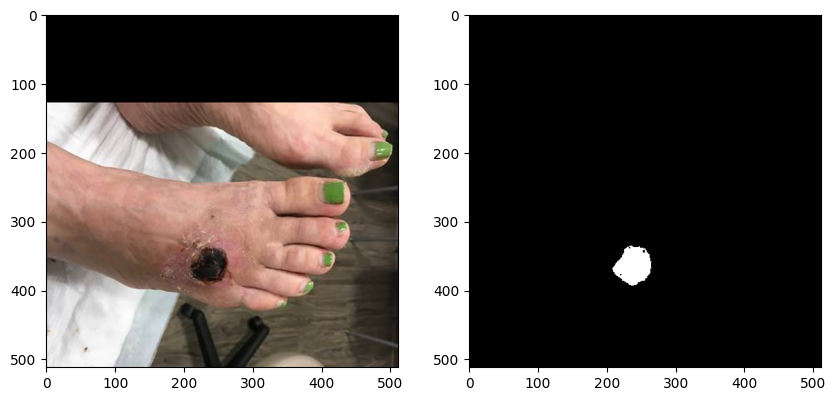

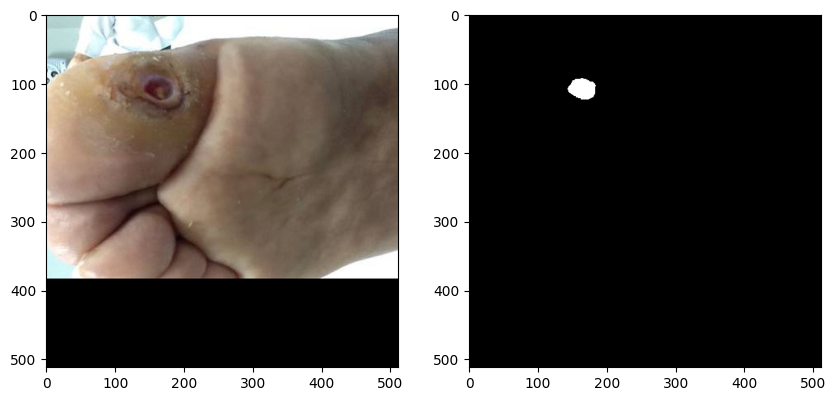

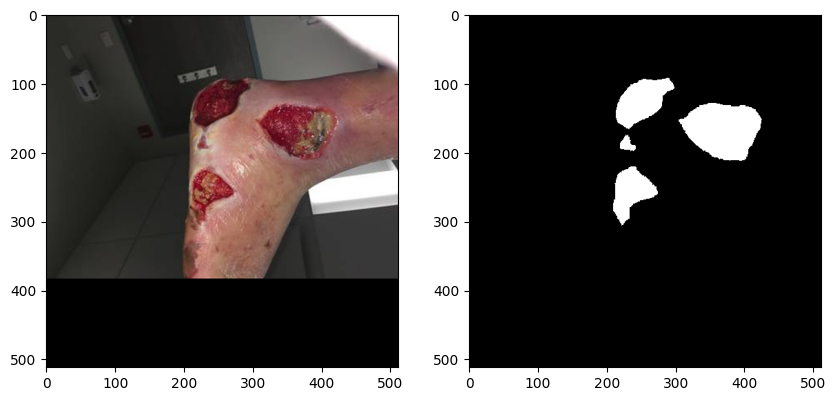

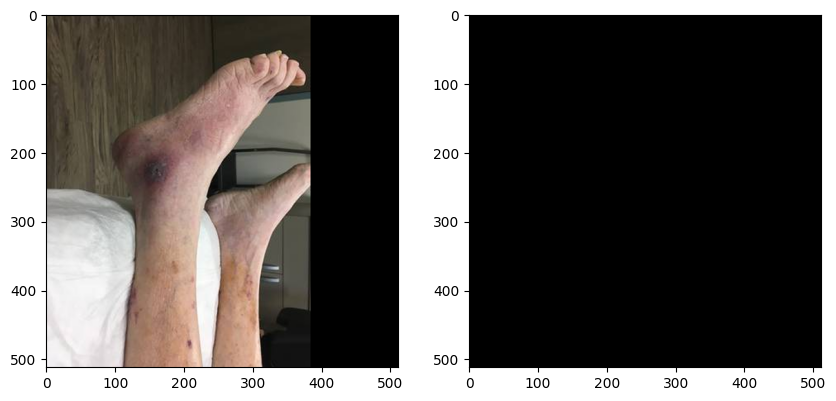

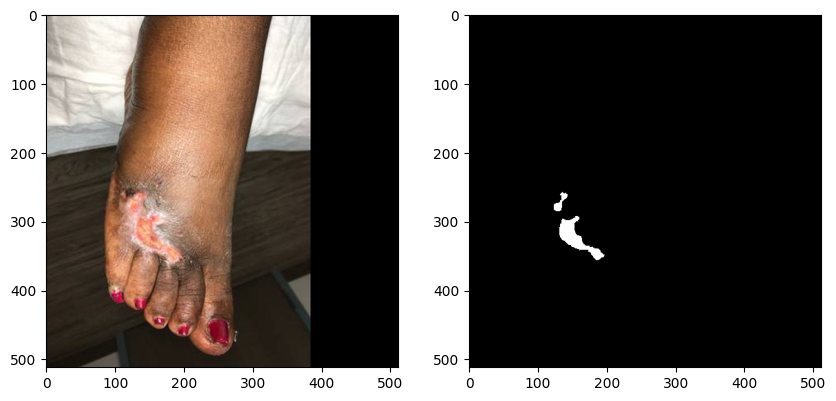

In [80]:
def show_augmented_samples(path: str, n_samples: int = 5) -> None:
    """
        Show random samples from the augmented dataset
    """

    imgs_dir_path = os.path.join(path, 'augmented_images')
    masks_dir_path = os.path.join(path, 'augmented_labels')

    for _ in range(n_samples):
        # Get random image and mask
        name = np.random.choice(os.listdir(imgs_dir_path))

        img_path = os.path.join(imgs_dir_path, name)
        mask_path = os.path.join(masks_dir_path, name)

        # Visualise image and mask
        visualise(img_path, mask_path)
show_augmented_samples('data/train')

### 1.4) Create final training data folders including both original and augmented images/labels

In [ ]:
def final_data_folders(train_data_dir: str) -> None:
    """
        Create final data folders including original and augmented images and masks
    """
    
    # get original image and mask directories
    img_dir = os.path.join(train_data_dir, 'images')
    mask_dir = os.path.join(train_data_dir, 'labels')

    # augmented image and mask directories
    aug_img_dir = os.path.join(train_data_dir, 'augmented_images')
    aug_mask_dir = os.path.join(train_data_dir, 'augmented_labels')

    # new dirs
    final_img_dir = os.path.join(train_data_dir, 'final_images')
    final_mask_dir = os.path.join(train_data_dir, 'final_labels')

    # create new dirs
    os.makedirs(final_img_dir, exist_ok=True)
    os.makedirs(final_mask_dir, exist_ok=True)

    # copy original images and masks
    for img_file, mask_file in zip(sorted(os.listdir(img_dir)), sorted(os.listdir(mask_dir))):
        img_path = os.path.join(img_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # copy
        os.system(f'cp {img_path} {final_img_dir}')
        os.system(f'cp {mask_path} {final_mask_dir}')

    # copy aug images and masks
    for img_file, mask_file in zip(sorted(os.listdir(aug_img_dir)), sorted(os.listdir(aug_mask_dir))):
        img_path = os.path.join(aug_img_dir, img_file)
        mask_path = os.path.join(aug_mask_dir, mask_file)

        # copy
        os.system(f'cp {img_path} {final_img_dir}')
        os.system(f'cp {mask_path} {final_mask_dir}')

    print(".....Final data folders created.....")

In [15]:
final_data_folders('data/train')

.....Final data folders created.....


### 1.5) Check if final data are mapped correctly

(512, 512, 3)


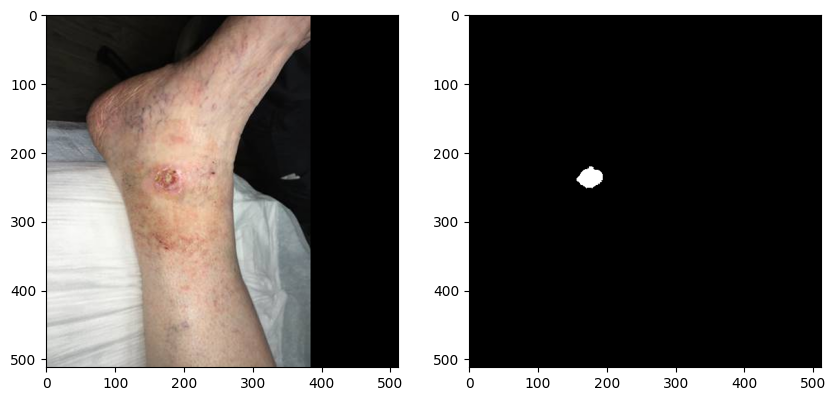

(512, 512, 3)


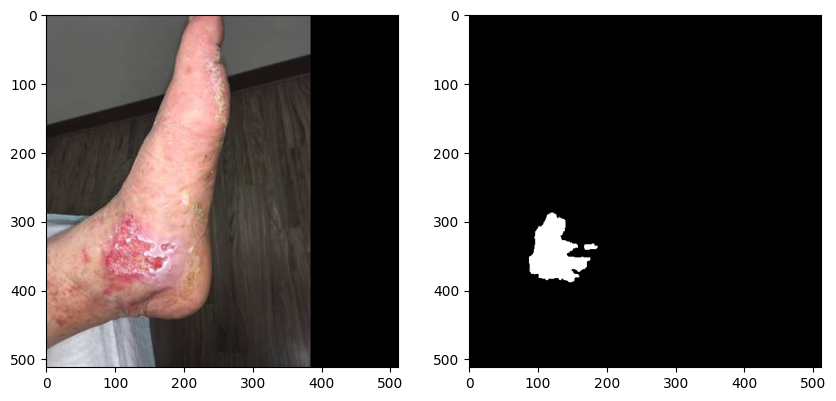

(512, 512, 3)


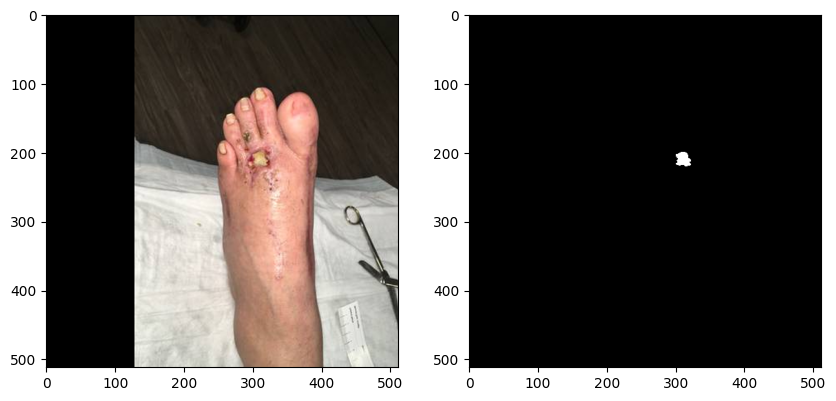

(512, 512, 3)


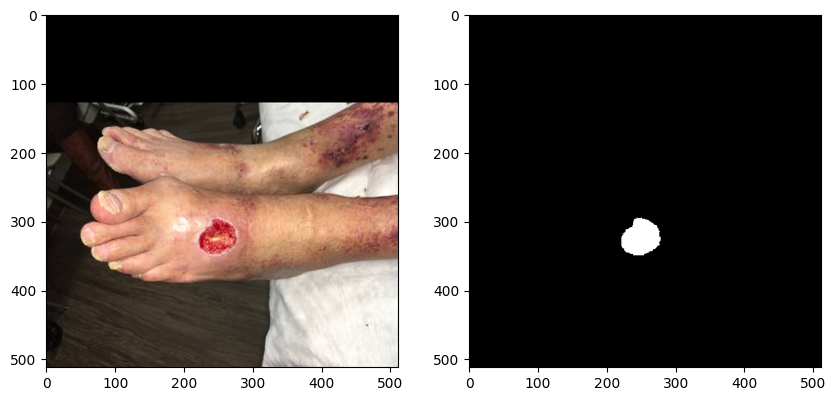

(512, 512, 3)


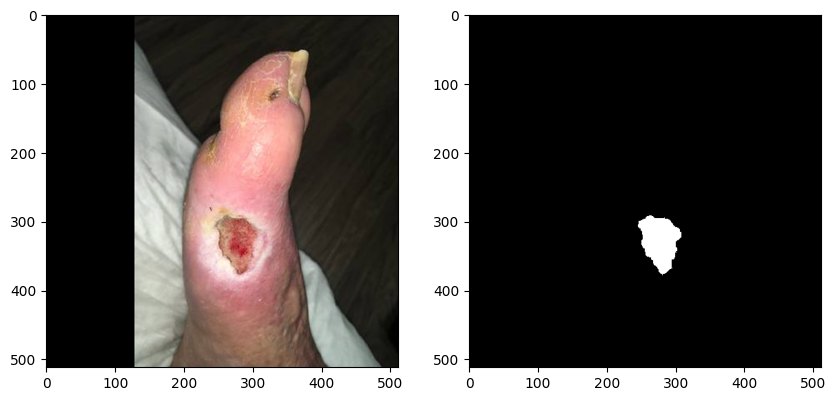

In [ ]:
count = 0

for img_file, mask_file in zip(os.listdir('data/train/final_images'), os.listdir('data/train/final_labels')):
    img_path = os.path.join('data/train/final_images', img_file)
    mask_path = os.path.join('data/train/final_labels', mask_file)

    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    print(mask.shape)

    count += 1

    _, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[1].imshow(mask)
    plt.show()

    if count == 5:
        break

> # 2) **Creating a tf dataset loader**

### 2.1) Exploring functionality of tf API for loading images and labels

In [11]:
# read images using tf
img = tf.io.read_file("data/train/images/0041.png")
img.dtype

I0000 00:00:1743828272.892095    1582 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


tf.string

In [12]:
# decode
img = tf.io.decode_image(img, channels=3, dtype=tf.float32)

In [13]:
img = tf.image.resize(img, (256, 256))

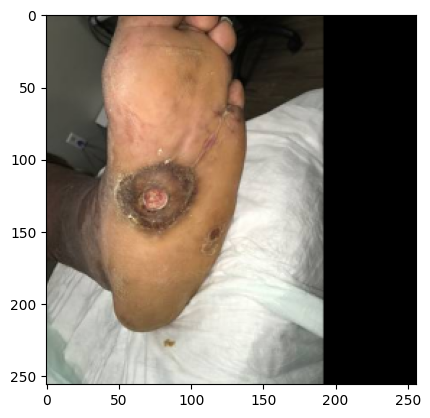

In [14]:
plt.imshow(img)

In [15]:
# read mask
mask = tf.io.read_file("data/train/labels/0041.png")
mask.dtype

tf.string

In [16]:
mask = tf.io.decode_image(mask, channels=1)

In [17]:
bin_mask = tf.cast(tf.greater(mask, 128), tf.float32)

In [18]:
(bin_mask == 0).numpy().sum(), (bin_mask == 1).numpy().sum()

(np.int64(261545), np.int64(599))

In [19]:
(bin_mask == 0).numpy().sum() + (bin_mask == 1).numpy().sum()

np.int64(262144)

In [20]:
512 * 512

262144

### 2.2) Creating the tf dataset loader

In [4]:
# ! read masks as grayscale !

class Dataset:
    """
        Class to encapsulate dataset creation & loading ops.
    """

    def __init__(self, dir: str, image_size: tuple[int, int], batch_size: int, shuffle: bool = True, shuffle_buffer_size: int = 200) -> None:
        """
            Initialize the dataset.

            Args:
                dir: path to directory containing images and masks
                image_size: size to resize images and masks
                batch_size: batch size
                shuffle: whether to shuffle dataset
                shuffle_buffer_size: buffer size for shuffle function
        """

        self.dir = dir
        self.image_size = image_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.shuffle_buffer_size = shuffle_buffer_size

    def _get_img_paths(self) -> list:
        """
            Get a list of image paths.
        """
        return sorted(
            [
                os.path.join(self.dir, "final_images", file)
                for file in os.listdir(os.path.join(self.dir, "final_images"))
            ]
        )

    
    def _get_mask_paths(self) -> list:
        """
            Get a list of mask paths.
        """
        return sorted(
            [
                os.path.join(self.dir, "final_labels", file)
                for file in os.listdir(os.path.join(self.dir, "final_labels"))
            ]
        )

    def preprocess(self, image: tf.Tensor, mask: tf.Tensor) -> tuple[tf.Tensor, tf.Tensor]:
        """
            Resize image and mask to image_size,
            Normalise image & binarise mask.

            Args:
                image: image tensor
                mask: mask tensor
        """

        # resize
        image = tf.image.resize(image, self.image_size)
        mask = tf.image.resize(mask, self.image_size)

        # normalise image
        image = tf.cast(image, tf.float32) / 255.0

        # binarise mask
        mask = tf.cast(tf.greater(mask, 128), tf.float32)

        return image, mask
    
    def load_preprocess_image_mask(self, img_path: str, mask_path: str) -> tuple[tf.Tensor, tf.Tensor]:
        """
            Loads & preprocesses an image, mask pair.

            Args:
                img_path: path to image
                mask_path: path to mask
        """

        #!NOTE - used tf.ensure_shape to prevent ValueError: 'images' contains no shape, by explicitly setting height, width dims. 
        #! This occurs becz the tf.image.resize 
        #! func expects tensors with defined rank, but the tensor produced by tf.io.decode_image are dynamic where height, width 
        #! are determined at runtime. 

        # read image
        img = tf.io.read_file(img_path)
        img = tf.io.decode_image(img, channels=3, expand_animations=False)
        img = tf.ensure_shape(img, [None, None, 3]) 

        # read mask (as grayscale!)
        mask = tf.io.read_file(mask_path)
        mask = tf.io.decode_image(mask, channels=1, expand_animations=False)
        mask = tf.ensure_shape(mask, [None, None, 1])

        # return preprocessed image and mask
        return self.preprocess(img, mask)

    def create(self) -> tf.data.Dataset:
        """
            Create tensorflow dataset.
        """
        # Get image and mask paths
        img_paths = self._get_img_paths()
        mask_paths = self._get_mask_paths()

        # create dataset from paths
        paths_dataset = tf.data.Dataset.from_tensor_slices((img_paths, mask_paths))

        # shuffle
        if self.shuffle:
            paths_dataset = paths_dataset.shuffle(
                buffer_size = self.shuffle_buffer_size or len(img_paths)
            )

        # map preprocessing 
        dataset = paths_dataset.map(
            self.load_preprocess_image_mask,
            num_parallel_calls = tf.data.AUTOTUNE
        )

        # batch and prefetch
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)

        return dataset
    
    def show_samples(self, n_samples: int = 5) -> None:
        """
            Display a few samples.
            - Show image, mask and overlay per sample.

            Args:
                n_samples: number of samples to display
        """

        # create dataset    
        dataset = self.create()

        # get a batch
        for img_batch, mask_batch in dataset.take(1):
            # display upto n_samples
            n = min(n_samples, img_batch.shape[0])
            n_cols = 3

            plt.figure(figsize=(15, 5*n))

            for i in range(n):
                # display image
                plt.subplot(n, n_cols, i*n_cols + 1)
                plt.imshow(img_batch[i])
                plt.title(f"Image {i}")
                plt.axis('off')

                # display mask
                plt.subplot(n, n_cols, i*n_cols + 2)
                plt.imshow(mask_batch[i], cmap='gray')
                plt.title(f"Mask {i}")
                plt.axis('off')

                # display image with mask overlay
                plt.subplot(n, n_cols, i*n_cols + 3)

                # copy img to var _masked
                _masked = np.copy(img_batch[i].numpy())

                _mask = mask_batch[i].numpy()

                # add a red overlay where mask is 1
                red = np.array([1.0, 0.0, 0.0])
                inverted_binary_mask = 1 - _mask
                red_black_mask = _mask * red

                _masked = (_masked * inverted_binary_mask) + red_black_mask

                plt.imshow(_masked)
                plt.title(f"Overlay {i+1}")
                plt.axis('off')

            plt.tight_layout()
            plt.show()

### 2.3) Examining the training & validation dataset

In [9]:
# create training and validation dataset instances

train_set = Dataset("data/train", image_size=(256,256), batch_size=4)

val_set = Dataset("data/validation", image_size=(256,256), batch_size=4, shuffle=False)

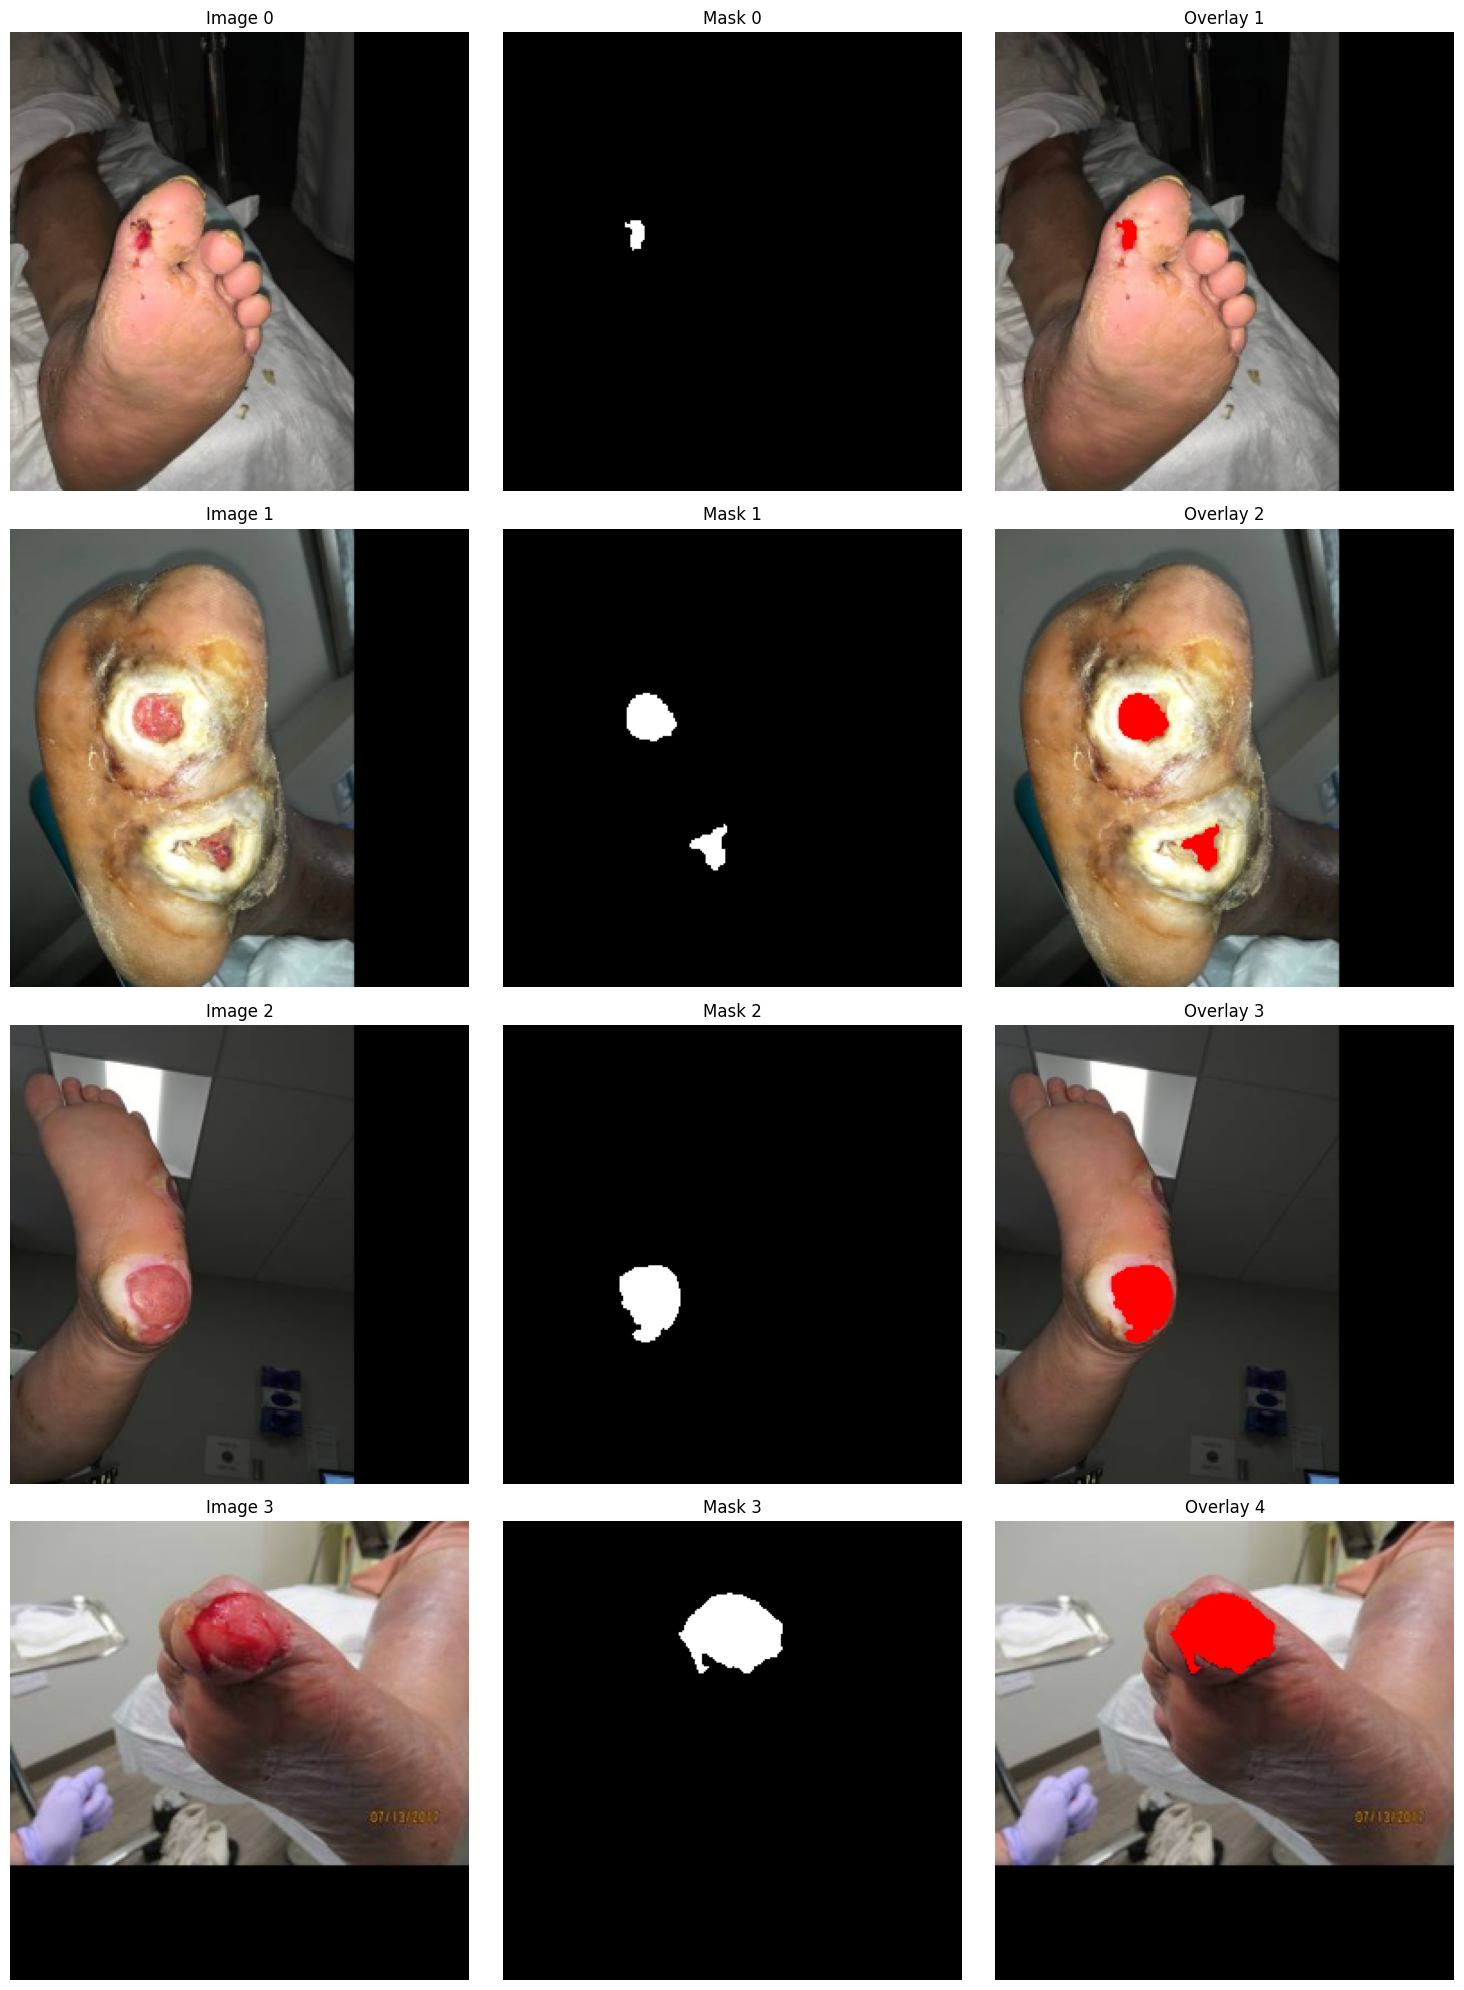

In [10]:
train_set.show_samples()

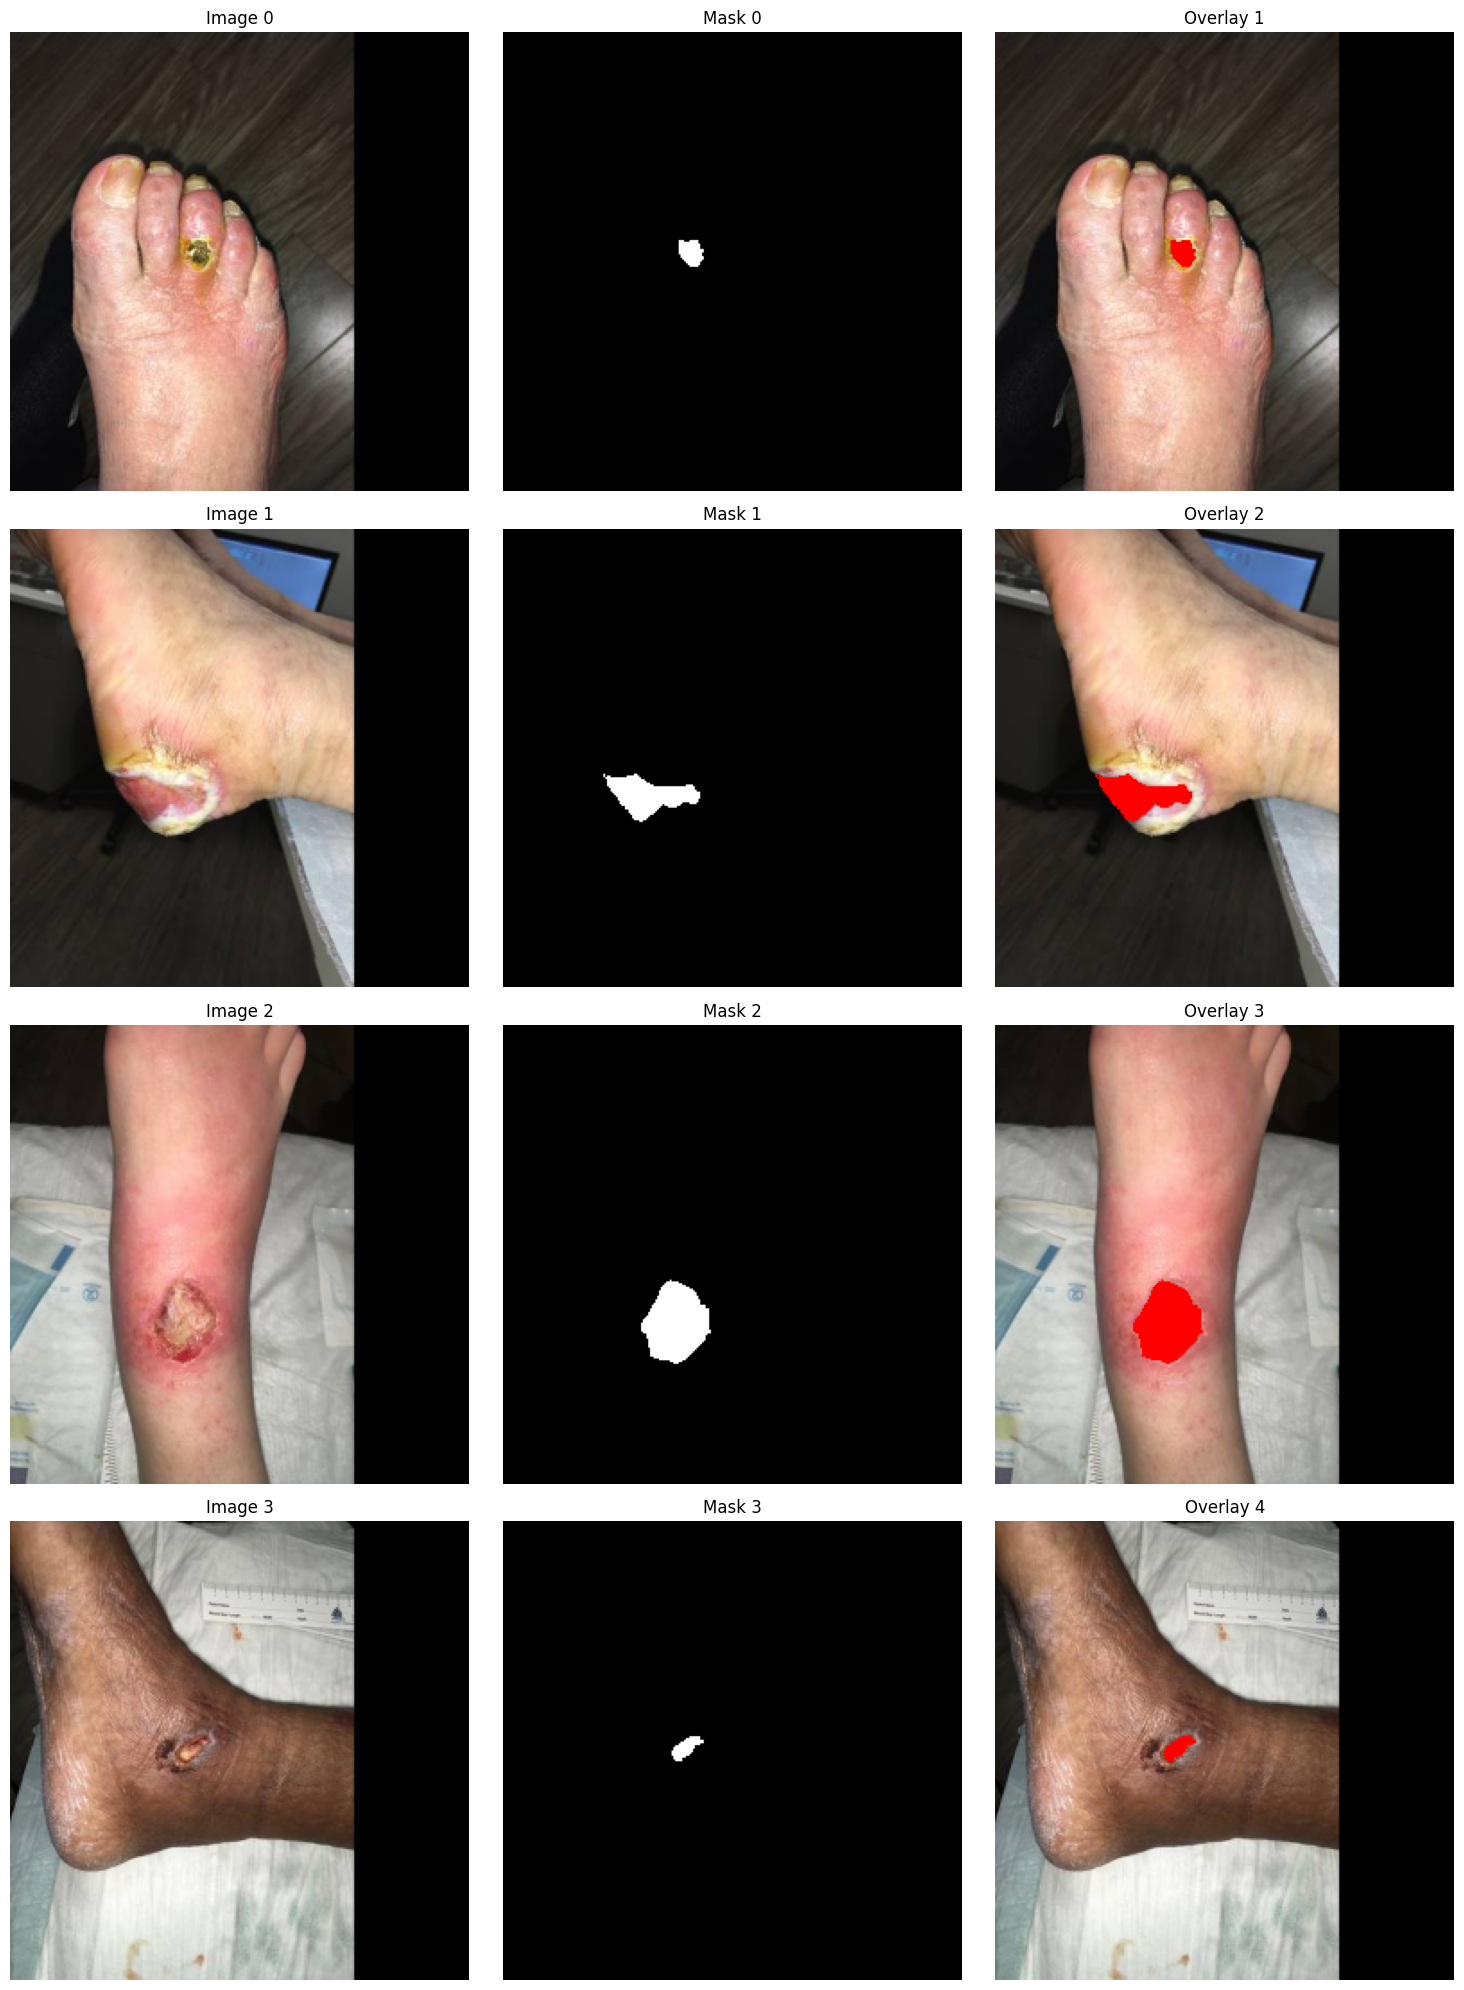

In [11]:
val_set.show_samples()

### 2.4) Examining shapes and value ranges of the images and labels

In [12]:
# create training and validation datasets
train_dataset = train_set.create()
val_dataset = val_set.create()

# check shapes
for img_batch, mask_batch in train_dataset.take(1):
    print(img_batch.shape, mask_batch.shape)

for img_batch, mask_batch in val_dataset.take(1):
    print(img_batch.shape, mask_batch.shape)

(4, 256, 256, 3) (4, 256, 256, 1)
(4, 256, 256, 3) (4, 256, 256, 1)


2025-05-09 00:29:05.619269: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
# examine images and masks
it = train_dataset.as_numpy_iterator()
img_batch, mask_batch = next(it)

print(img_batch[0].max(), img_batch[0].min()) # should be between 0 and 1 (normalised)
print(mask_batch[0].max(), mask_batch[0].min()) # should be 0 or 1 (binarised)

1.0 0.0
1.0 0.0


> # 3) **Creating the U-Net model**

In [3]:
# References used:
# https://arxiv.org/abs/1505.04597, 
# https://medium.com/geekculture/u-net-implementation-from-scratch-using-tensorflow-b4342266e406
# https://www.tensorflow.org/tutorials/images/segmentation
# https://www.tensorflow.org/guide/keras/serialization_and_saving#config_methods

from keras.layers import Conv2D, Activation, MaxPool2D, Concatenate, Conv2DTranspose  # type: ignore
from keras import Model, Input # type: ignore
import tensorflow as tf # type: ignore
import keras # type: ignore

@keras.saving.register_keras_serializable(package="my_models", name="UNet")
class UNet(Model):
    """
        Class that implements the UNet architecture. (With some modifications)
    """

    def __init__(self, input_shape: tuple[int, int, int], n_output_classes: int = 1, n_base_filters: int = 64, **kwargs) -> None:
        """
        Initialise UNet architecture.

        Args:
            n_output_classes: Number of output classes.
            input_shape: Input image shape (height, width, channels). Default is 1.
            n_base_filter: Number of convolutional filters in the first downsampling and upsampling layers. Default is 64.
            **kwargs: Additional arguments for the base class.
        """

        super().__init__(**kwargs)  

        # store class attributes
        self.input_shape = input_shape
        self.n_classes = n_output_classes
        self.n_filters = n_base_filters

        # store activation and Conv2D kernel initializer
        self.activation = 'relu'
        self.kernel_init = 'HeNormal'

        # store model
        self._model = self.build_model()

    def get_config(self):
        """
            Return a dictionary containing the constructor arguments to enable model reconstruction.
        """
        # get base config
        config = super().get_config()

        config.update({
            'input_shape': self.input_shape,
            'n_output_classes': self.n_classes,
            'n_base_filters': self.n_filters,
        })

        return config
    
    @classmethod
    def from_config(cls, config):
        """
            Create a new instance of the class from the config dictionary.
        """

        # extract input_shape, n_output_classes, n_base_filters
        input_shape = config.pop('input_shape')
        n_output_classes = config.pop('n_output_classes')
        n_base_filters = config.pop('n_base_filters')

        # create new instance
        return cls(
            input_shape = input_shape,
            n_output_classes = n_output_classes,
            n_base_filters = n_base_filters,
            **config
        )

    def downsampler_block(self, inputs: tf.Tensor, n_filters: int, kernel_size: int = 3) -> tf.Tensor:
        """     
            Single encoder block with Double convolutional layers & batch normalisation layers.

            Args:
                inputs: Tensor output of previous layer.
                n_filters: Number of convolutional filters.
                kernel_size: Height and width of the kernel/filter. Default is 3.
        """

        # pass inputs through the layers
        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init
        )(inputs)
        x = Activation(self.activation)(x)

        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init
        )(x)
        x = Activation(self.activation)(x)

        return x

    def upsampler_block(self, inputs: tf.Tensor, n_filters: int, skip_connection: tf.Tensor, kernel_size: int = 2) -> tf.Tensor:  
        """
            Single Decoder block with Conv2DTranspose layers, Conv2D layers, and Concatenate.

            Args:
                inputs: Tensor output of previous layer.
                n_filters: Number of convolutional filters.
                skip_connection: Output of the similar level Conv layer from the downsampling section.
                kernel_size: Height and width of the kernel/filter. Default is 2.
        """

        up_conv = Conv2DTranspose(
            filters = n_filters,
            kernel_size = kernel_size,
            strides = 2,
            padding = 'same'
        )(inputs)

        concat = Concatenate()(
            [up_conv, skip_connection]
        )

        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init,
            activation = self.activation
        )(concat)

        x = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            padding = 'same',
            kernel_initializer = self.kernel_init, 
            activation = self.activation
        )(x)

        return x
    
    def build_model(self) -> tf.keras.Model:
        """
            Build the entire UNet architecture.
        """

        inputs = Input(shape = self.input_shape)

        # ENCODER (Downsampling)
        d1 = self.downsampler_block(inputs, self.n_filters)
        mp1 = MaxPool2D(pool_size = (2,2))(d1)

        d2 = self.downsampler_block(mp1, 2*self.n_filters)
        mp2 = MaxPool2D(pool_size = (2,2))(d2)

        d3 = self.downsampler_block(mp2, 4*self.n_filters)
        mp3 = MaxPool2D(pool_size = (2,2))(d3)

        d4 = self.downsampler_block(mp3, 8*self.n_filters)
        mp4 = MaxPool2D(pool_size = (2,2))(d4)

        # BOTTLENECK
        bottleneck = self.downsampler_block(mp4, 16*self.n_filters)

        # DECODER (Upsampling)
        u4 = self.upsampler_block(bottleneck, 8*self.n_filters, d4)
        u3 = self.upsampler_block(u4, 4*self.n_filters, d3)
        u2 = self.upsampler_block(u3, 2*self.n_filters, d2)
        u1 = self.upsampler_block(u2, self.n_filters, d1)

        outputs = Conv2D(
            filters = self.n_classes,
            kernel_size = 1,
            padding = 'same',
            activation = 'sigmoid'
        )(u1)

        # create & return model
        return Model(
            inputs = inputs,
            outputs = outputs
        )


    def call(self, inputs: tf.Tensor):
        """
            Forward pass.

            Args:
                inputs: Image input tensors.
        
        """

        return self._model(inputs)

In [5]:
# create model
model = UNet((256, 256, 3), name = 'my_custom_unet')

In [16]:
model.summary()

Model: "my_custom_unet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional (Functional)         │ (None, 256, 256, 1)    │    25,809,345 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,809,345 (98.45 MB)

 Trainable params: 25,809,345 (98.45 MB)

 Non-trainable params: 0 (0.00 B)

### 3.1) Training

In [6]:
class BinaryMeanIoU(tf.keras.metrics.Metric):
    """
        Custom metric to calculate mean IoU for binary segmentation.
    """

    def __init__(self, name="mean_iou", **kwargs):
        super().__init__(name=name, **kwargs)

        # create MeanIoU metric
        self.mean_iou = tf.keras.metrics.MeanIoU(num_classes=2)

    def update_state(self, y_true, y_pred, sample_weight=None):
        """
            Update the state of the metric.

            Args:
                y_true: True labels.
                y_pred: Predicted labels.
                sample_weight: Sample weights.
        """
        # convert y_pred to binary
        y_pred_thresh = tf.cast(y_pred > 0.5, tf.int32)
        # convert y_true to int32
        y_true = tf.cast(y_true, tf.int32)
        # update mean iou
        self.mean_iou.update_state(y_true, y_pred_thresh)

    def result(self):
        """
            Return the result of the metric.
        """
        return self.mean_iou.result()

    def reset_states(self):
        """
            Reset the state of the metric.
        """
        self.mean_iou.reset_states()

# create custom metric
binary_mean_iou = BinaryMeanIoU()

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=[binary_mean_iou, tf.keras.metrics.BinaryAccuracy()])

In [20]:
# implement early stopping and model checkpoint callbacks

# early stopping to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_mean_iou',
    mode='max',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

# model checkpoint to save best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Checkpoints/unet_best_model_new.keras',
    monitor='val_mean_iou',
    save_best_only=True,
    verbose=1
)

# lr scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.5 ** (epoch // 5),
    verbose=1
)

In [21]:
# train the model

model.fit(train_dataset, validation_data=val_dataset, epochs=200, callbacks=[early_stopping, model_checkpoint, lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/200


I0000 00:00:1746714591.712179   52762 service.cc:152] XLA service 0x7fa3d8002180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746714591.712254   52762 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-09 00:29:51.808817: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746714592.965341   52762 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-09 00:29:54.935317: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.33GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-09 00:29:55.651114: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_b

1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - binary_accuracy: 0.9826 - loss: 0.1054 - mean_iou: 0.5582

2025-05-09 00:32:47.634661: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-09 00:32:47.980545: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.33GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.



Epoch 1: val_mean_iou improved from inf to 0.63778, saving model to Checkpoints/unet_best_model_new.keras
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 189s 131ms/step - binary_accuracy: 0.9826 - loss: 0.1054 - mean_iou: 0.5583 - val_binary_accuracy: 0.9907 - val_loss: 0.0361 - val_mean_iou: 0.6378 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/200
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - binary_accuracy: 0.9903 - loss: 0.0356 - mean_iou: 0.6403
Epoch 2: val_mean_iou did not improve from 0.63778
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 152s 125ms/step - binary_accuracy: 0.9903 - loss: 0.0356 - mean_iou: 0.6403 - val_binary_accuracy: 0.9917 - val_loss: 0.0280 - val_mean_iou: 0.6972 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/200
1215/1215 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - binary_accuracy: 0.9914 - loss: 0.0262 - mean_iou: 0.6877
Epoch 3: val_mean_iou did not improve from 0.63778
1215/1215 ━━━━━━━━━━━━━

### 3.2) Plotting the training history

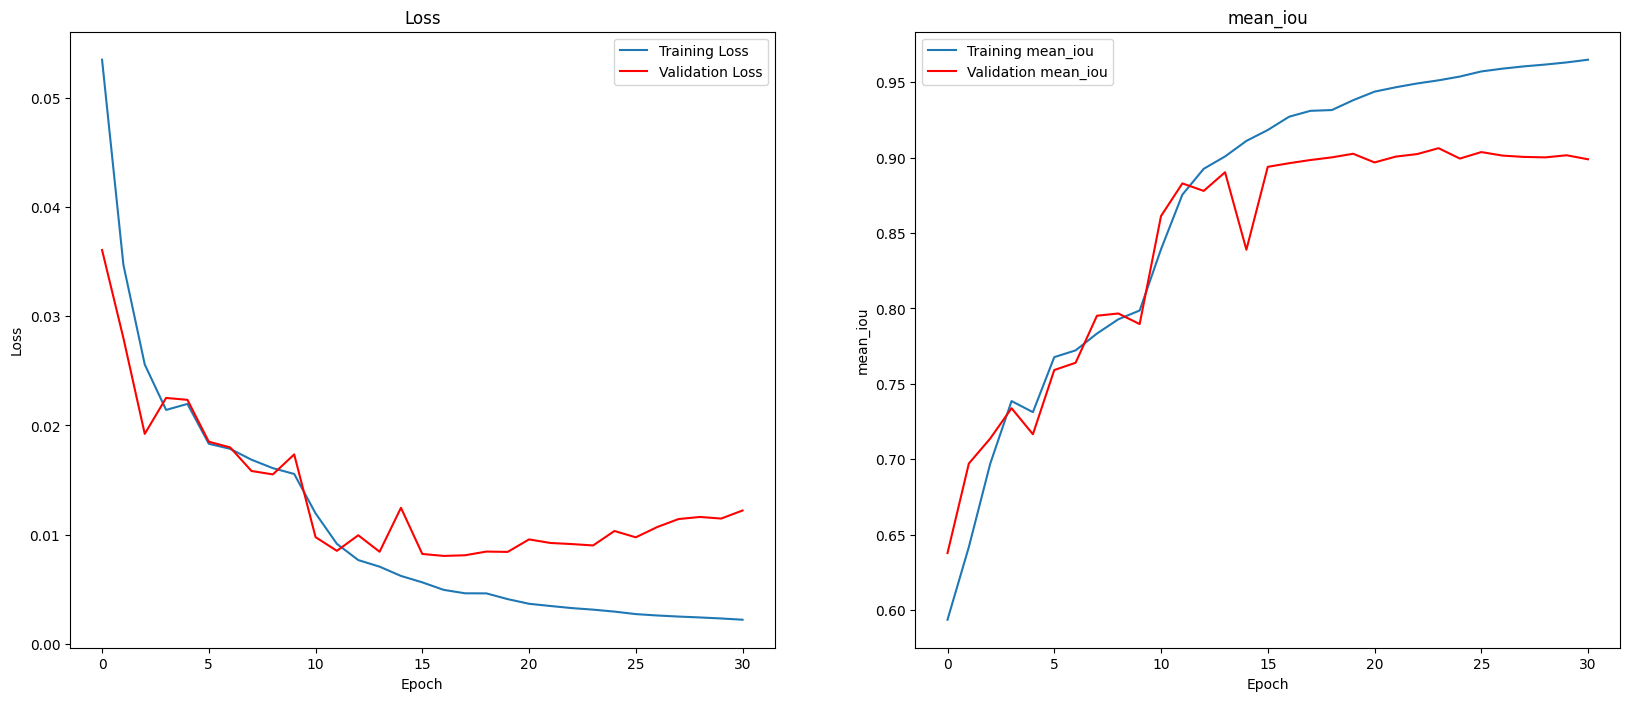

In [22]:
# plot losses and accuracy

def plot_loss_acc(history: tf.keras.callbacks.History) -> None:
    """
        Plot loss and accuracy.

        Args:
            history: History object from model.fit
    """

    plt.figure(figsize=(20, 8))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_iou'], label='Training mean_iou')
    plt.plot(history.history['val_mean_iou'], label='Validation mean_iou', color='red')
    plt.title('mean_iou')
    plt.xlabel('Epoch')
    plt.ylabel('mean_iou')
    plt.legend()

    plt.show()

plot_loss_acc(model.history)

> # 4) **Evaluations**

### 4.1) Show predictions on the test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


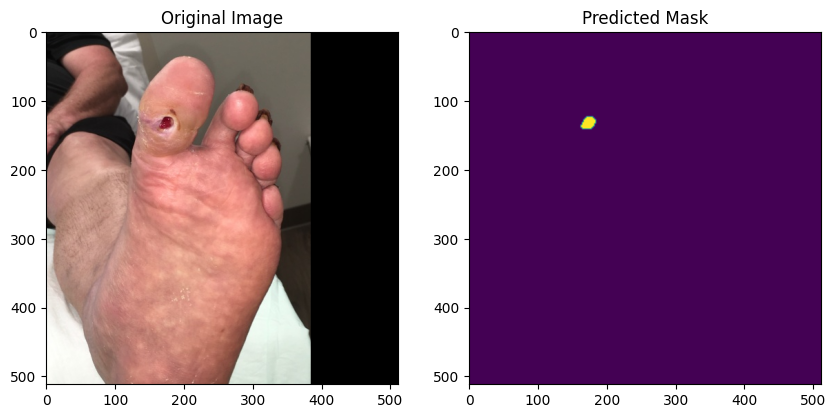

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


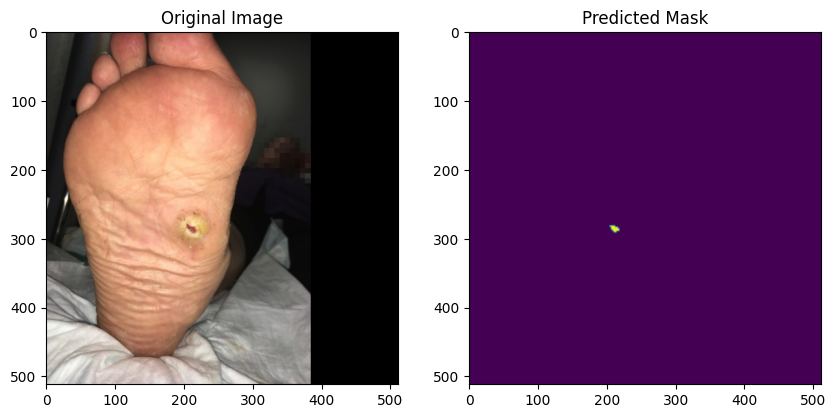

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


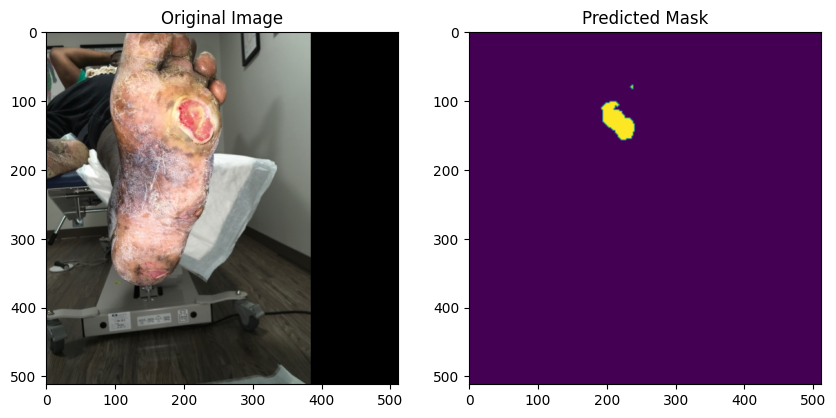

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


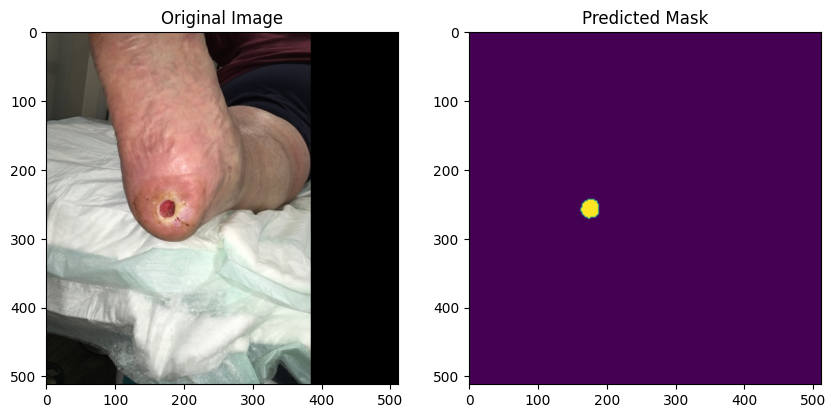

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


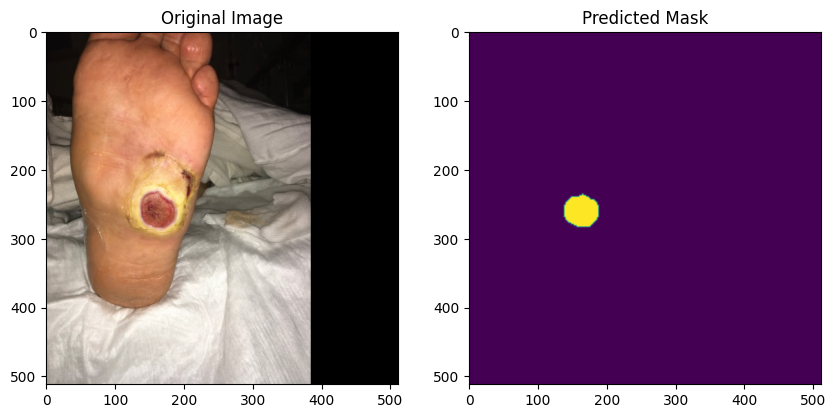

In [24]:
def show_test_results(model: tf.keras.Model, test_imgs_path: str, n_samples: int = 5) -> None:
    """
        Show original test images and predicted masks.

        Args:
            model: Trained model
            test_imgs_path: Path to test images
            n_samples: Number of samples to show. Default is 5.
    """

    # get test images
    test_imgs = os.listdir(test_imgs_path)

    # get random n_samples
    samples = np.random.choice(test_imgs, n_samples)

    for img_file in samples:
        img_path = os.path.join(test_imgs_path, img_file)

        # read image
        img = tf.io.read_file(img_path)
        img = tf.io.decode_image(img, channels = 3, expand_animations=False)
        img = tf.ensure_shape(img, [None, None, 3])

        # store original image shape
        original_shape = img.shape

        # resize
        reimg = tf.image.resize(img, (256, 256))
        # normalize
        norm_img = tf.cast(reimg, tf.float32) / 255.0
        # add batch dim
        batch_img = tf.expand_dims(norm_img, axis=0)

        # predict
        pred = model.predict(batch_img)
        # convert to binary mask
        pred_mask = tf.cast(tf.greater(pred, 0.5), tf.float32)

        # plot
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)

        # resize pred_mask to original shape
        pred_mask = tf.image.resize(pred_mask, original_shape[:2])
        plt.imshow(tf.squeeze(pred_mask)) # squeeze to remove batch dim
        plt.title('Predicted Mask')

        plt.show()

# use model from checkpoint
loaded_model = tf.keras.models.load_model('Checkpoints/unet_best_model.keras', custom_objects={'UNet': UNet})
show_test_results(loaded_model, 'data/test/images')

### 4.2) Saving Predictions on the test data 

In [25]:
# function to make predictions on test data and save them in a directory
def predict_save_test(model: tf.keras.Model, test_dir_path: str) -> None:
    """
        Predicts segmentation for test data and saves them in a directory

        Args:
            model: Trained model
            test_dir_path: Path of the test directory 
    """

    # get test images
    test_images_paths = sorted(os.listdir(os.path.join(test_dir_path, 'images')))

    # path for preds dir
    pred_dir = os.path.join(test_dir_path, 'PredNEW')

    # make predictions for each image and save

    for img_path in test_images_paths:
        # read img
        path = os.path.join(test_dir_path, 'images', img_path)
        img = tf.io.read_file(path)
        img = tf.io.decode_image(img, channels = 3, expand_animations=False)
        img = tf.ensure_shape(img, [None, None, 3])

        # store original image shape
        original_shape = img.shape

        # preprocess
        img = tf.image.resize(img, (256, 256))
        img = tf.cast(img, tf.float32) / 255.0

        # add batch dim
        img = tf.expand_dims(img, axis=0)

        # predict
        pred = model.predict(img)

        # create binary mask
        pred_mask = tf.cast(tf.greater(pred, 0.5), tf.float32)
        
        # format for saving
        pred_mask = tf.image.resize(pred_mask, original_shape[:2])
        pred_mask = tf.squeeze(pred_mask)
        pred_mask = tf.cast(pred_mask, tf.uint8) * 255

        # save
        os.makedirs(pred_dir, exist_ok=True)
        path = img_path.split('.')[0] + ' - pred.png'
        pred_path = os.path.join(pred_dir, path)
        cv2.imwrite(pred_path, pred_mask.numpy())

    print("Predictions done and saved")

In [27]:
loaded_model = tf.keras.models.load_model('Checkpoints/unet_best_model_new.keras', custom_objects={'UNet': UNet, 'BinaryMeanIoU': BinaryMeanIoU})
predict_save_test(loaded_model, 'data/test')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11

### 4.3) Saving Predictions on other types of wounds

In [7]:
# function to make predictions on other wound types and save them in a directory (mind the .Identifier files)
def predict_save_other(model: tf.keras.Model, other_dir_path: str) -> None: 
    """
        Predicts segmentation for other wound types data and saves them in a directory

        Args:
            model: Trained model
            other_dir_path: Path of the directory containing other wound type images
    """

    # go through other wound types
    other_types_dirs = os.listdir(other_dir_path)

    for other_type_dir in other_types_dirs:
        # get into its Wound dir
        images_path = os.path.join(other_dir_path, other_type_dir, 'Wound')
        wound_img_dir = sorted(os.listdir(images_path))

        # go through each image
        for img_name in wound_img_dir:
            # skip .Identifier files
            ext = img_name.split('.')[-1]

            if not ext == "Identifier":
                # read img
                img_path = os.path.join(images_path, img_name)
                img = tf.io.read_file(img_path)
                img = tf.io.decode_image(img, channels = 3, expand_animations=False)
                img = tf.ensure_shape(img, [None, None, 3])

                # store original image dims to resize back the mask
                original_shape = img.shape

                # preprocess
                img = tf.image.resize(img, (256, 256))
                img = tf.cast(img, tf.float32) / 255.0

                # add batch dim
                img = tf.expand_dims(img, axis=0)

                # predict
                pred = model.predict(img)

                # create binary mask
                pred_mask = tf.cast(tf.greater(pred, 0.5), tf.float32)

                # save
                pred_mask = tf.image.resize(pred_mask, (original_shape[0], original_shape[1]))
                pred_mask = tf.squeeze(pred_mask)
                pred_mask = tf.cast(pred_mask, tf.uint8) * 255

                dir_path = os.path.join(other_dir_path, other_type_dir, 'PredNEW')
                os.makedirs(dir_path, exist_ok=True)
                path_name = img_name.split('.')[0] + " - pred.jpg"
                path = os.path.join(dir_path, path_name)
                cv2.imwrite(path, pred_mask.numpy())

        print(f"Predictions for {other_type_dir} done and saved")

    print("\n ---- All predictions done and saved ----")

In [8]:
loaded_model = tf.keras.models.load_model('Checkpoints/unet_best_model_new.keras', custom_objects={'UNet': UNet, 'BinaryMeanIoU': BinaryMeanIoU})
predict_save_other(loaded_model, 'data/other wound types')

I0000 00:00:1746721666.709353   98735 service.cc:152] XLA service 0x7f8940014470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746721666.709422   98735 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-09 02:27:46.736462: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746721666.857732   98735 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-09 02:27:47.854497: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-09 02:27:48.014111: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_b

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1746721671.462885   98735 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predictions for Foot wounds and ulcers done and saved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predictions for Miscellaneous wound images done and saved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predictions for Extravasation wounds done and saved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/ste